<a href="https://colab.research.google.com/github/CLAUDERNORONHA/PROJETO/blob/main/ANALISE_VINHOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Previsão da qualidade do vinho com aprendizado de máquina**



Os produtores de vinho gostam de se orgulhar das avaliações de qualidade que seus vinhos recebem dos críticos, porque uma avaliação de vinho alta significa maior qualidade, o que resulta em aumento nas vendas para o vinicultor. 

No entanto, a qualidade de um vinho não é absoluta. O quão bom é ou não um vinho depende de quem está fazendo o julgamento. 


A opinião combinada de um grupo de especialistas em vinhos experientes e treinados é geralmente considerada um julgamento definitivo da qualidade de um vinho.


Os padrões de desempenho que os especialistas em vinho usam para julgar a qualidade do vinho incluem:

· Equilíbrio: a relação entre doçura, acidez, tanino e álcool. Um vinho é equilibrado quando nada se destaca ao saboreá-lo, como o amargor ou o excesso de doçura.

· Comprimento: descreve um vinho que você pode saborear em toda a extensão da sua língua.

· Profundidade: tem uma dimensão de verticalidade que não tem gosto plano e unidimensional.

· Complexidade: vinho que possui múltiplos aromas e sabores e continua revelando diferentes sabores ou impressões.

· Acabamento: A impressão que um vinho deixa no fundo da boca e na garganta depois de engolido.

· Tipicidade: o grau em que um vinho reflete suas origens varietais e demonstra as características de assinatura da uva a partir da qual foi produzido.

Predizendo a qualidade do vinho

Os padrões que os especialistas em vinho usam para julgar a qualidade do vinho baseiam-se principalmente no sentido do paladar e na impressão do vinho. Eu acho que os ingredientes do vinho e como o vinho é processado desempenham um papel importante em como o vinho tem seu sabor e, em última análise, determina sua qualidade.


Neste artigo, tentarei prever a qualidade do vinho tinto com base nos componentes que estão no vinho. Vou usar o conjunto de dados de qualidade do vinho tinto de Kaggle, que possui as características fundamentais que influenciam a qualidade do vinho. Em seguida, usarei vários modelos de aprendizado de máquina para prever se um vinho tinto é classificado como “ruim” ou “bom”.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [5]:

vinho = pd.read_csv('/content/drive/MyDrive/1-CIENCIA DE DADOS-CURSOS_ESTUDO DE CASO/ESTUDO DE CASO/ANALISE_VINHO/winequality-red.csv')

In [6]:
vinho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Obtive o conjunto de dados de qualidade do vinho tinto da Kaggle. Este conjunto de dados está relacionado com variantes tintas do vinho “Vinho Verde” português. Devido a questões de privacidade e logística, apenas variáveis ​​físico-químicas (entradas) e sensoriais (saída) estão disponíveis (por exemplo, não há dados sobre os tipos de uva, marca do vinho, preço de venda do vinho, etc.).


Usaremos modelos de aprendizado de máquina de classificação para fazer previsões. As classes são ordenadas e não balanceadas (ou seja, há muito mais vinhos normais do que vinhos ruins ou excelentes).

As variáveis ​​de recurso incluem:


- acidez fixa - os ácidos fixos primários encontrados no vinho são tartárico, - succínico, cítrico e málico.

- acidez volátil - os ácidos gasosos presentes no vinho.

- ácido cítrico - o ácido orgânico fraco encontrado naturalmente nas frutas cítricas.

- açúcar residual - quantidade de açúcar restante após a fermentação.

- cloretos - quantidade de sal presente no vinho.

- dióxido de enxofre livre - usado na prevenção do vinho por oxidação e deterioração microbiana.

- dióxido de enxofre total - a porção de SO2 que está livre no vinho mais a porção que está ligada a outros produtos químicos no vinho.

- densidade - a massa por unidade de volume de vinho.

- pH - usado para verificar a acidez.

- sulfatos - preservam o frescor e protegem o vinho da oxidação e das bactérias.

- álcool - porcentagem de álcool presente no vinho.
A variável de destino é:

  ** qualidade (as pontuações estão entre 0 e 10)

In [7]:
vinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


Existem 1.599 registros de vinhos e 12 recursos. O conjunto de dados contém valores flutuantes e inteiros. O recurso de qualidade será a variável de destino com pontuações entre 0 (ruim) e 10 (ótimo). Presumi que as pontuações de qualidade foram atribuídas por juízes experientes que provaram os vinhos e forneceram uma pontuação.

Verificar Valores Nulos.


In [12]:
vinho.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Não há valores nulos ou ausentes, portanto, haverá uma quantidade mínima de limpeza de dados necessária.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


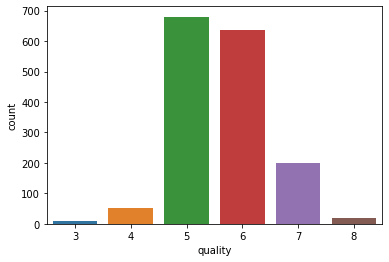

In [14]:
#Visualizar contagem para cada índices de qualidade

sns.countplot(vinho['quality']);

Visulizar a relação entre a acidez fixa e a qualidade do vinho

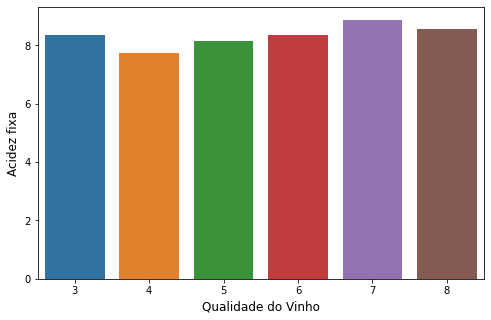

In [19]:
fig = plt.figure(figsize=(8,5))
sns.barplot(x = 'quality',
            y = 'fixed acidity',
            data = vinho,
            ci = None)

#
plt.xlabel('Qualidade do Vinho', size= 12)
plt.ylabel('Acidez fixa', size = 12);

Visualizar a relação entre a acidez vólatil e a qualidade do vinh

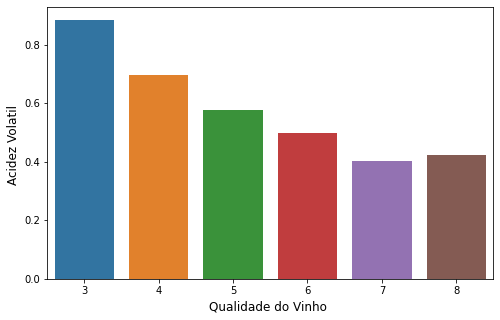

In [22]:
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', 
            y = 'volatile acidity', 
            data = vinho,
            ci = None)
# set labels
plt.xlabel("Qualidade do Vinho ", size=12)
plt.ylabel("Acidez Volatil ", size=12);

Visulizar a relação entre o ácido cítrico e a qualidade do vinho

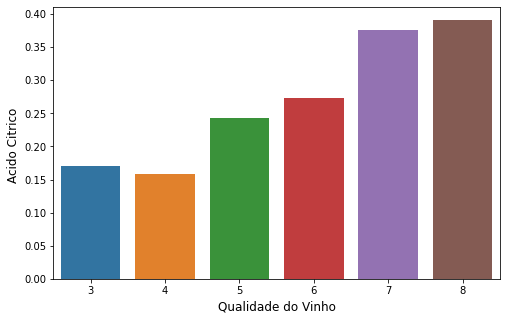

In [24]:
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', 
            y = 'citric acid', 
            data = vinho,
            ci = None)
# set labels
plt.xlabel("Qualidade do Vinho", size=12)
plt.ylabel("Acido Citrico ", size=12);

Visualize a relação entre os cloretos e a qualidade do vinho. 

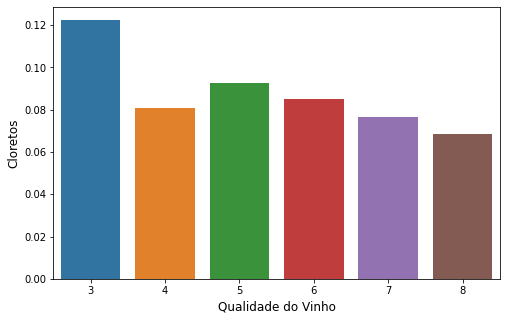

In [27]:
fig = plt.figure (figsize = (8,5)) 
sns.barplot (x = 'quality', 
            y = 'chlorides', 
            data = vinho, 
            ci = None ) 
 
plt.xlabel ("Qualidade do Vinho" , size = 12) 
plt.ylabel ("Cloretos", size = 12);

Visualize a relação entre o dióxido de enxofre livre e a qualidade do vinho

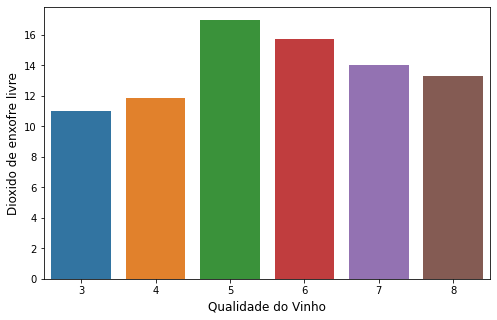

In [29]:
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', 
            y = 'free sulfur dioxide', 
            data = vinho,
            ci = None)

plt.xlabel("Qualidade do Vinho", size=12)
plt.ylabel("Dioxido de enxofre livre", size=12);

Visualize a relação entre densidade e qualidade do vinho. 

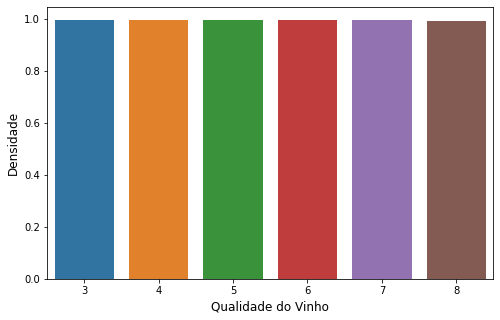

In [30]:
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', 
            y = 'density', 
            data = vinho,
            ci = None)

plt.xlabel("Qualidade do Vinho", size=12)
plt.ylabel("Densidade", size=12);

Visualize a relação entre o pH e a qualidade do vinho

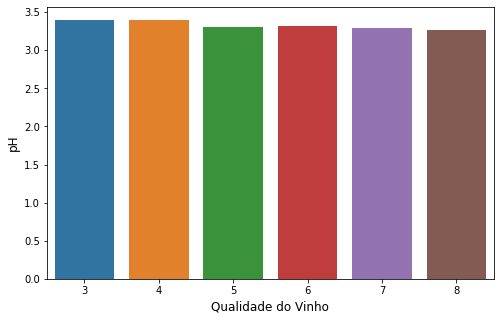

In [31]:
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', 
            y = 'pH', 
            data = vinho,
            ci = None)
# set labels
plt.xlabel("Qualidade do Vinho", size=12)
plt.ylabel("pH", size=12);

Visualize a relação entre o álcool e a qualidade do vinho

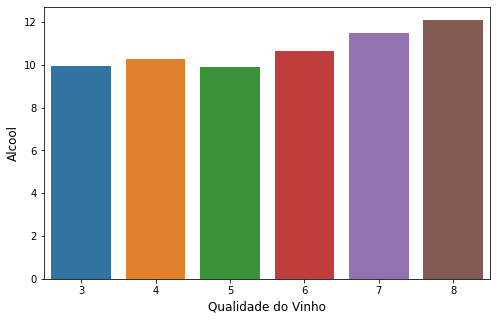

In [32]:
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'quality', 
            y = 'alcohol', 
            data = vinho,
            ci = None)

plt.xlabel("Qualidade do Vinho", size=12)
plt.ylabel("Alcool", size=12);

O resumo das descobertas inclui o seguinte:

- A maioria das pontuações de qualidade estava na faixa de 5 a 7.

- Quando a quantidade de acidez fixa foi ligeiramente aumentada, as pontuações de qualidade aumentaram gradualmente.
- Quando a quantidade de acidez volátil foi diminuída, as pontuações de qualidade diminuíram.
- Quando a quantidade de ácido cítrico foi aumentada, os índices de qualidade aumentaram.
- Quando a quantidade de cloretos diminuiu, os índices de qualidade diminuíram.
- Quando a quantidade de sulfatos aumentou, os índices de qualidade aumentaram.
- Quando a quantidade de álcool aumentou, os escores de qualidade aumentaram.

Classificação

Classifique a qualidade do vinho em classes de ruim e bom, atribuindo faixas para as pontuações de qualidade. 

Vinhos com uma pontuação de qualidade entre 3 e 6 são classificados como  0 ("ruim"). 

Os vinhos com uma pontuação de qualidade entre 7 e 8 são classificados como 
 1 ("bom"). vinho ['qualidade'] = vinho 

In [34]:
vinho['quality'] = vinho['quality'].replace([3,4,5,6],0)
vinho['quality'] = vinho['quality'].replace([7,8],1)
vinho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [35]:
#contagens por classe de qualidade do vinho
vinho['quality'].value_counts()

0    1379
1     217
Name: quality, dtype: int64

Criar um plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


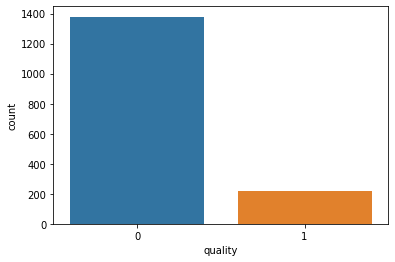

In [37]:
sns.countplot(vinho['quality']);

Existem 1.382 vinhos classificados como ruins e 217 vinhos classificados como bons.

Visualize as percentagens para vinhos de má e boa qualidade.

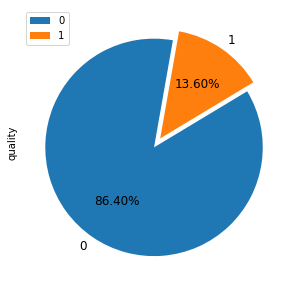

In [39]:
vinho.quality.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True,
                                 fontsize=12, figsize=(8,5), textprops={'color':"black"});

86,43% dos vinhos foram classificados como ruins e 13,57% foram classificados como bons.

Gerar e exibir matriz de correlação para recursos. 
   -  Usaremos o método de correlação de Pearson.

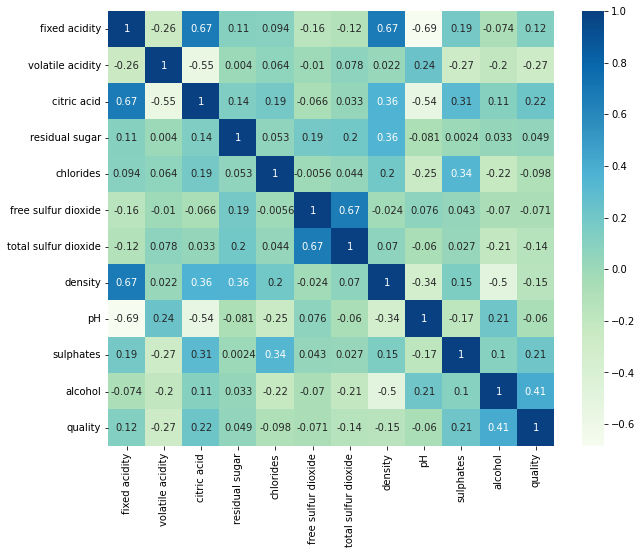

In [42]:
correlacao = vinho.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlacao, annot = True, cmap = 'GnBu');

DIVIDIR OS DADOS EM TREINO E TESTE

Primeiro, precisamos dividir nossos dados em valores x (os dados que usaremos para fazer previsões) e valores y (os dados que estamos tentando prever).

In [43]:
X_data = vinho.drop('quality', axis=1)
y_data = vinho['quality']

Use a função train_test_split para gerar dados de treinamento e dados de teste. O conjunto de dados de teste é 25% do conjunto de dados original.

In [44]:
X_training_data, X_test_data, y_training_data, y_test_data = train_test_split(X_data, y_data, test_size = 0.25, random_state=42)

Normalize os conjuntos de dados de recursos. StandardScaler transformará os dados de forma que sua distribuição tenha um valor médio 0 e desvio padrão 1.

In [45]:
sc = StandardScaler()
X_training_data = sc.fit_transform(X_training_data)
X_test_data = sc.fit_transform(X_test_data)

Vamos treinar modelos, fazer previsões e avaliar o desempenho de quatro modelos diferentes.


- Random Forrest Model

In [47]:
# Crie um objeto modelo.
model_rf = RandomForestClassifier(n_estimators= 200)

In [48]:
# Treine o modelo nos dados de treinamento. 
model_rf.fit(X_training_data, y_training_data)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
# Faça previsões sobre os dados de teste. 
predictions_rf = model_rf.predict(X_test_data)

In [51]:
# Calcule a pontuação de precisão
rf = accuracy_score(y_test_data, predictions_rf)
print(rf)

0.9047619047619048


 Mostra o relatório de classificação

In [53]:
print(classification_report(y_test_data, predictions_rf))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       347
           1       0.77      0.38      0.51        52

    accuracy                           0.90       399
   macro avg       0.84      0.68      0.73       399
weighted avg       0.90      0.90      0.89       399



O modelo forrest aleatório previu corretamente que 90% dos vinhos eram bons ou ruins.
- 91% previram corretamente que os vinhos eram ruins.
- 77% previram corretamente que os vinhos eram bons.

REGRESSÃO LOGISTICA

In [70]:
# Crie um objeto modelo.
model_lr = LogisticRegression ()

In [72]:
# Treine o modelo nos dados de treinamento.
model_lr.fit (X_training_data, y_training_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
# Faça previsões sobre os dados de teste.
predictions_lr = model_lr.predict (X_test_data)

In [75]:
# Calcule a pontuação de precisão.
lr = accuracy_score(y_test_data, predictions_lr)
print(lr)

0.8872180451127819


Mostra o relatório de classificação

In [76]:
print(classification_report(y_test_data, predictions_lr))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       347
           1       0.62      0.35      0.44        52

    accuracy                           0.89       399
   macro avg       0.76      0.66      0.69       399
weighted avg       0.87      0.89      0.87       399



O modelo de regressão logística previu corretamente 89% dos vinhos como bons ou ruins.

- 91% previram corretamente que os vinhos eram ruins.
- 62% previram corretamente que os vinhos eram bons.

Modelo de máquina vetorial de suporte(CVM)

In [54]:
# Crie um objeto modelo.
model_SVC = SVC()

In [55]:
# Treine o modelo nos dados de treinamento.

model_SVC.fit(X_training_data, y_training_data)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
# Faça previsões sobre os dados de teste.
predictions_svc = model_SVC.predict(X_test_data)

In [63]:
# Calcule a pontuação(acuracy) de precisão.
svm = accuracy_score(y_test_data, predictions_svc)
print(svm)

0.8872180451127819


 Mostra o relatório de classificação

In [64]:
print(classification_report(y_test_data, predictions_svc))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       347
           1       0.67      0.27      0.38        52

    accuracy                           0.89       399
   macro avg       0.78      0.62      0.66       399
weighted avg       0.87      0.89      0.87       399



O modelo da máquina de vetores de suporte previu corretamente que 89% dos vinhos eram bons ou ruins.

- 90% previram corretamente que os vinhos eram ruins.
- 67% previram corretamente que os vinhos eram bons.

K Modelo de Vizinhos Mais Próximos

In [77]:
#Cria o modelo 
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [78]:
#treina o modelo 
model_kn.fit(X_training_data, y_training_data)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [79]:
predictions_kn = model_kn.predict(X_test_data)

In [80]:
#Calcula a acuracia do modelo 
kn = accuracy_score(y_test_data, predictions_kn)
print(kn)

0.87468671679198


In [81]:
print(classification_report(y_test_data, predictions_kn))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       347
           1       0.53      0.37      0.43        52

    accuracy                           0.87       399
   macro avg       0.72      0.66      0.68       399
weighted avg       0.86      0.87      0.86       399



O modelo K Nearest Neighbours previu corretamente 89% dos vinhos como bons ou ruins.
- 91% previram corretamente que os vinhos eram ruins.
- 53% previram corretamente que os vinhos eram bons.

Mostrar pontuação de precisão por modelo

,Model,Accuracy_score
0,Random Forest,0.904762
1,Logistic Regression,0.887218
2,Support Vector Machine,0.887218
3,KNeighbours,0.874687


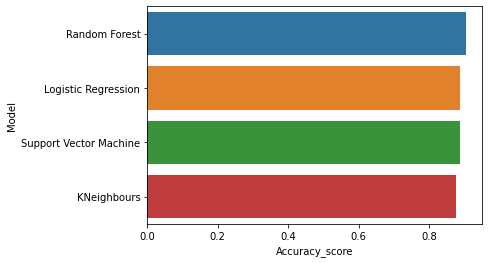

In [82]:
# Show Accuraccy Score by Model.
models = pd.DataFrame({
    'Model':['Random Forest', 'Logistic Regression', 'Support Vector Machine' , 'KNeighbours'],
    'Accuracy_score' :[rf, lr, svm, kn]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

Conclusões: 

Todos os modelos testados apresentaram escores de alta precisão, variando de 88,50% a 89,75%. O modelo forrest aleatório teve a pontuação de precisão mais alta. Esse modelo previu corretamente que 90% dos empréstimos seriam bons ou ruins. 91% dos casos previram corretamente os vinhos como sendo ruins e 71% dos casos previram corretamente os vinhos como bons. Os vinhos de qualidade “boa” foram classificados com uma pontuação de qualidade de 7 ou 8. Os vinhos de qualidade “fraca” foram classificados como tendo uma pontuação de qualidade entre 3 e 6.


As pontuações de qualidade do vinho podem ser melhoradas aumentando a quantidade de acidez fixa, ácido cítrico, sulfatos e álcool e diminuindo a quantidade de acidez volátil e cloretos. As quantidades específicas para cada físico-química podem ser encontradas nos gráficos de barras acima.


A precisão dos modelos pode ser melhorada por ter um conjunto de dados maior com mais equilíbrio entre vinhos de baixa e boa qualidade. Além disso, o ajuste de alguns dos hiperparâmetros dos modelos pode aumentar a pontuação de precisão.